# Start of model (Pulse 3 class)

### Author : Akash C

### Install the Libraries

In [1]:
# import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install imbalanced-learn
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install scikit-learn

### Import the Libraries

In [22]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import jaccard_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import GridSearchCV
import seaborn as sns

### Read the dataset

In [23]:
# Read the dataset as a dataframe
df = pd.read_excel('pulse.xlsx')
df.head(5)

,Unnamed: 0,PR,PP,PT1,PT2,PT3,PDID,PHR,SVA,STRESS,RATIO,Unnamed: 11
0,C401,0.812959,0.824135,0.243374,0.526769,0.283395,0.012436,75.0,69.921786,1.037138,3.501733,1
1,C402,0.845954,0.747754,0.140305,0.348656,0.208351,0.464244,74.0,48.832606,1.218822,5.513958,1
2,C403,0.870881,0.612590,0.290799,0.550933,0.260134,0.168164,70.0,59.273583,1.439769,2.168398,1
3,C404,0.993293,0.491175,0.389590,0.700164,0.310574,0.009515,61.0,145.568237,0.708102,4.796764,1
4,C405,0.802703,0.582300,0.141758,0.370029,0.228271,0.245060,76.0,35.335561,1.417359,4.138236,1


### Visualizing the plot of feature vs feature(bi-variate analysis)

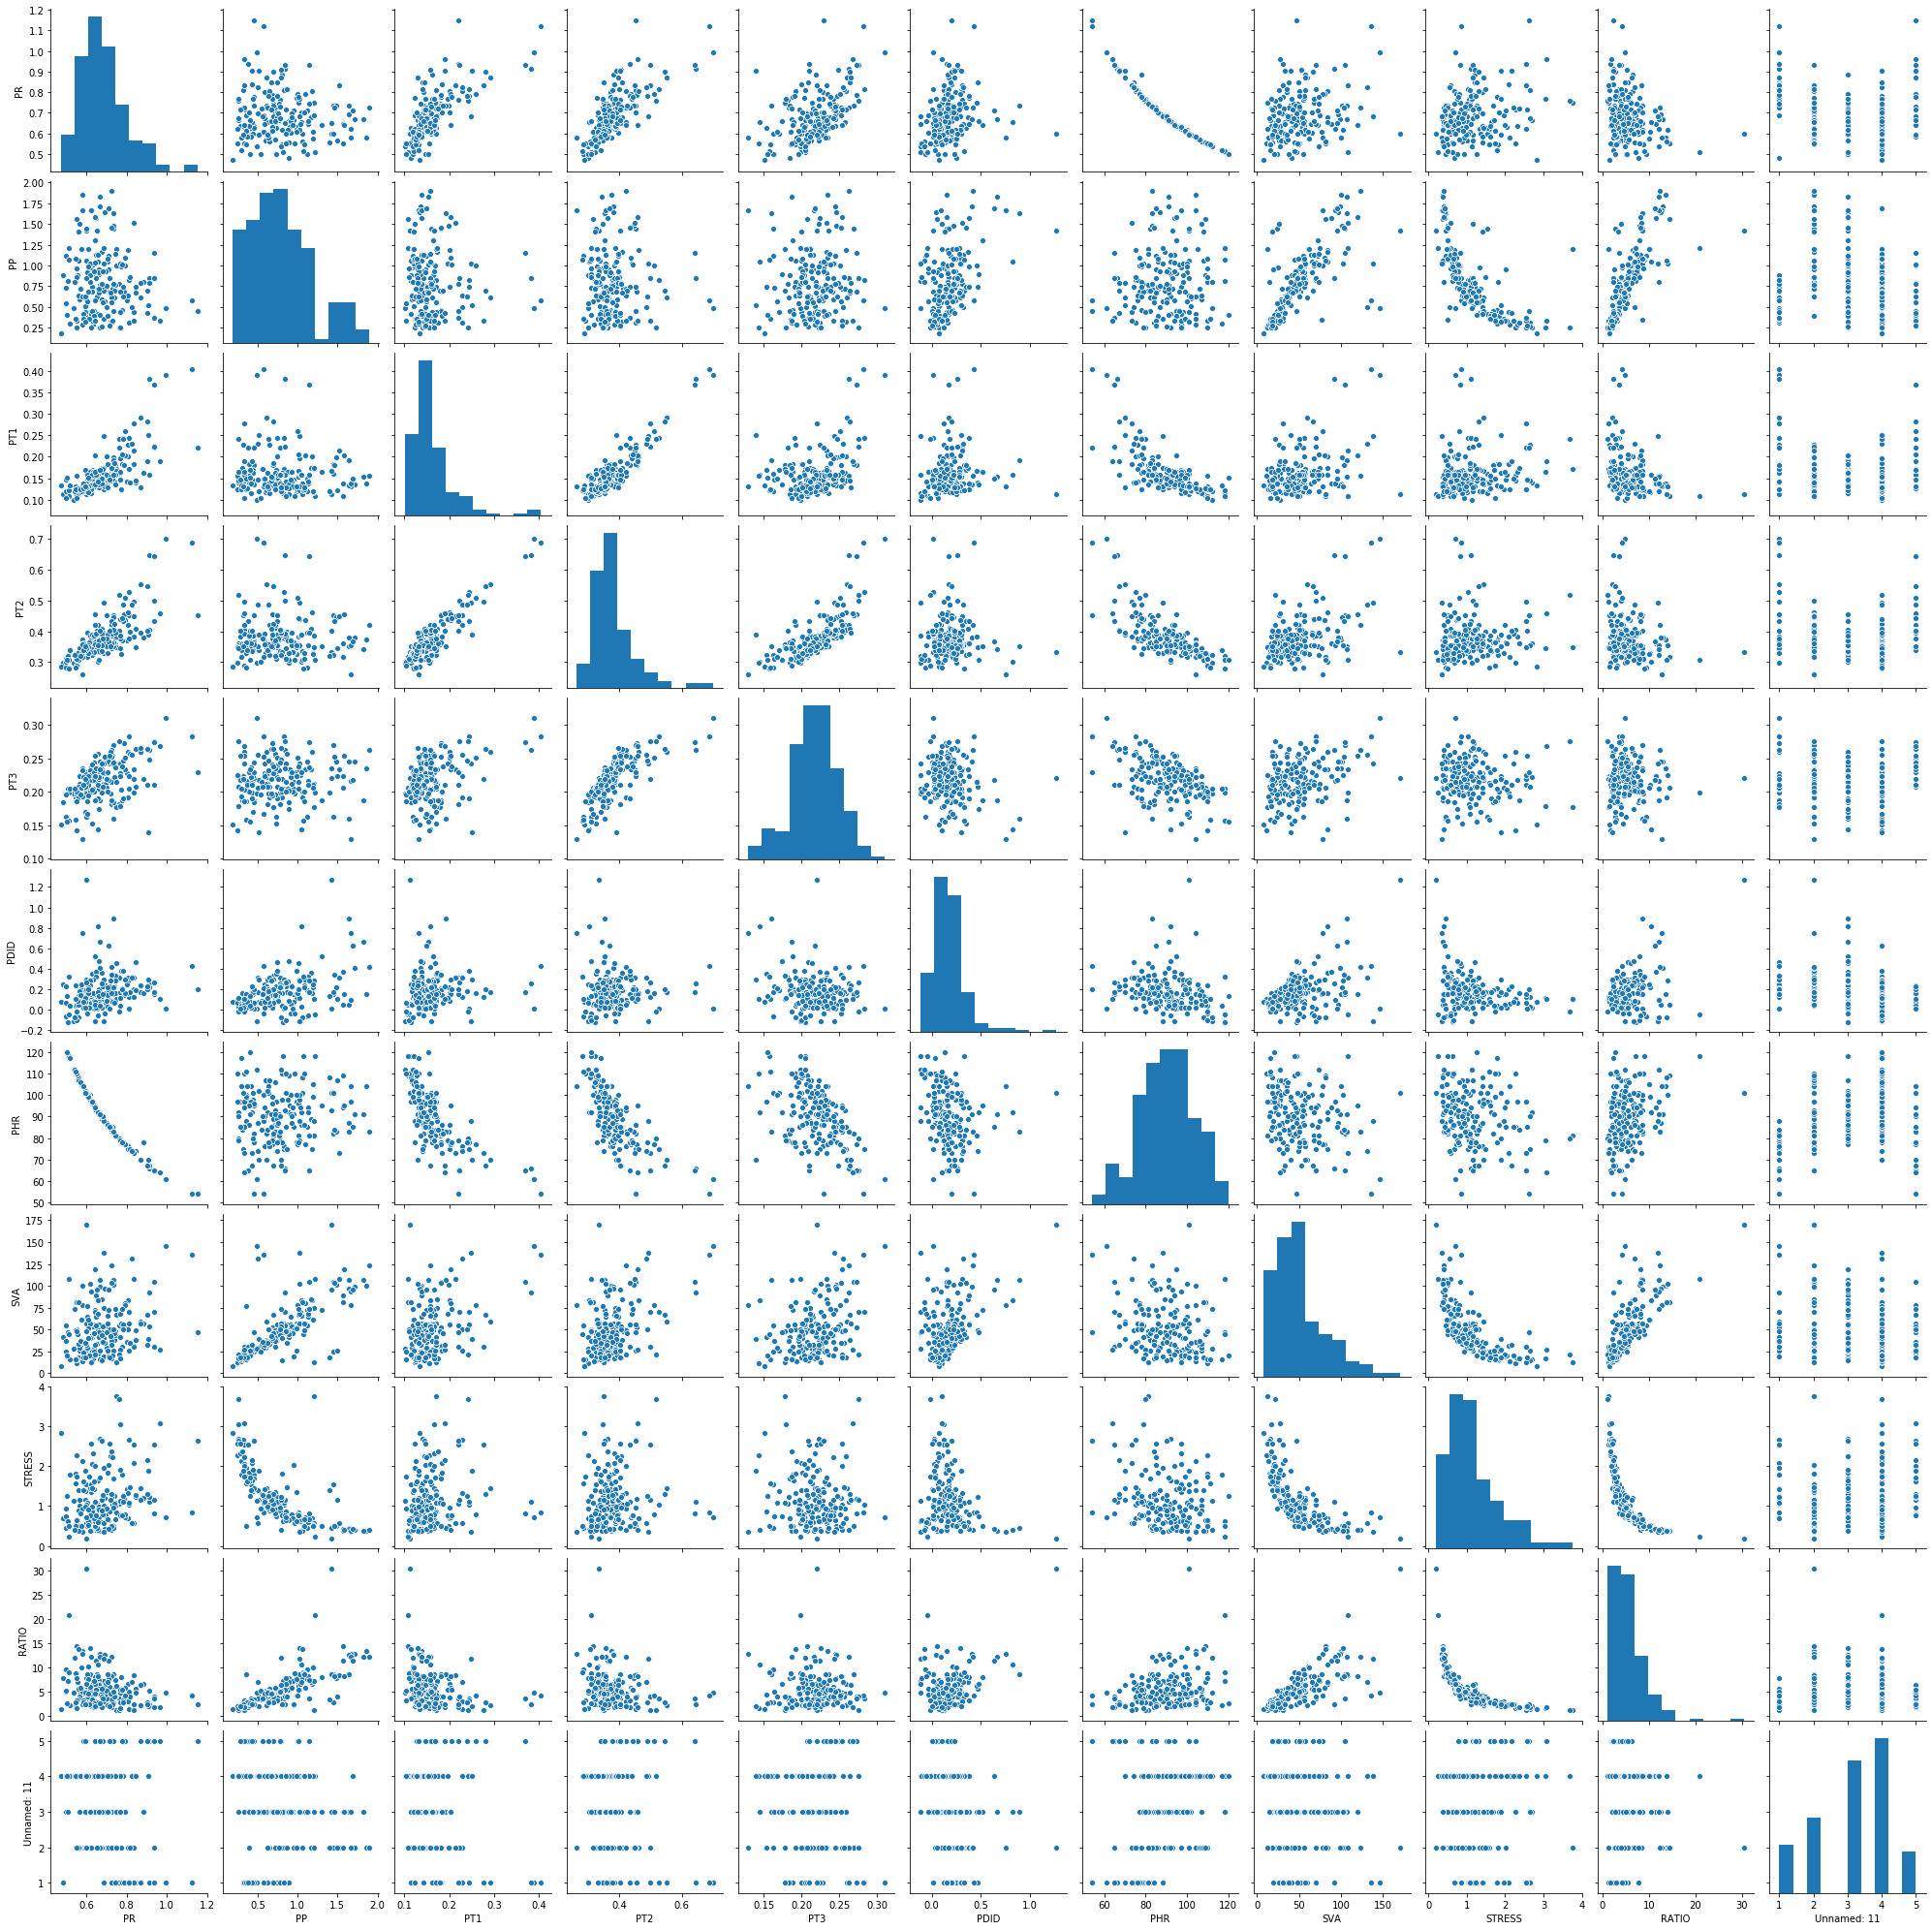

In [24]:
sns.pairplot(df)

### Convert the class names

In [25]:
# Convert the classes into 'B','C','M'
bcm = df.iloc[:,0]

# Seperate the patient ID from dataframe
df = df.iloc[:,1:]
# Fill all the NaN values
df['PHR'] = df['PHR'].fillna(df['PHR'].mean())

# Rename the classes
for i in range(len(df)):
    df.iloc[i,-1] = bcm[i][0]

# Split the classes from the dataset and assign it to a variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]# Fill all the NaN values
df['PHR'] = df['PHR'].fillna(df['PHR'].mean())

# Rename the classes
for i in range(len(df)):
    df.iloc[i,-1] = bcm[i][0]


### Split the classes as dependent and independent

In [26]:
# Split the classes from the dataset and assign it to a variable
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

### SMOTE analysis on the data

In [27]:
col = ['PR', 'PP', 'PT1', 'PT2', 'PT3', 'PDID', 'PHR', 'SVA', 'STRESS',
       'RATIO', 'Unnamed: 11']

# Synthetic Minority oversampling technique to balance the dataset
oversample = SMOTE()
X,y = oversample.fit_resample(X,y)

### Droping PDID feature for chi2 and ANNOVA analysis

In [28]:
X_withoutpdid = X.drop(['PDID'],axis=1)

### chi2 analysis

In [29]:
chi2(X_withoutpdid,y)

(array([2.74649631e+00, 1.10805614e+01, 1.57202561e+00, 1.11793065e+00,
        2.78737533e-01, 3.17747587e+02, 1.37912263e+02, 1.92719734e+01,
        1.77967872e+02]),
 array([2.53282919e-01, 3.92542487e-03, 4.55657975e-01, 5.71800385e-01,
        8.69907177e-01, 1.00458856e-69, 1.12910076e-30, 6.53347372e-05,
        2.26343302e-39]))

### ANNOVA analysis

In [30]:
f_classif(X_withoutpdid,y)

(array([ 90.06792721,  44.80370526,  48.79496268,  42.78122848,
         42.0273515 , 118.05599511,   4.35608303,  36.49313719,
         63.43091436]),
 array([1.46910238e-33, 1.88698378e-18, 6.98475645e-20, 1.02188854e-17,
        1.92442173e-17, 7.69420209e-42, 1.33813079e-02, 2.12167310e-15,
        5.87673876e-25]))

### Scaling the data and Label encoding the data

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

### Train Test split

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Create functions for  models

In [33]:
# SVM classifier
from sklearn.svm import SVC
def support_vector():
    svm = SVC()
    svmfit = svm.fit(X_train,y_train)
    return svm.predict(X_test),svmfit
    
# Random forest
from sklearn.ensemble import RandomForestClassifier
def random_forest():
    rfc = RandomForestClassifier()
    rfcfit = rfc.fit(X_train,y_train)
    return rfc.predict(X_test),rfcfit
    
# XGBOOST
import xgboost
def XGboost():
    xgb = xgboost.XGBClassifier()
    xgbfit = xgb.fit(X_train,y_train)
    return xgb.predict(X_test),xgbfit
    
# Stochastic gradient descent
from sklearn.linear_model import SGDClassifier
def sto_grad():
    sgdc = SGDClassifier()
    sgdcfit = sgdc.fit(X_train,y_train)
    return sgdc.predict(X_test),sgdcfit

### Prediction of each class

In [34]:
svm_pred = support_vector()
rfc_pred = random_forest()
xgb_pred = XGboost()
sgdc_pred = sto_grad()

### Predict and evaluate for efficiency

In [35]:
from sklearn.metrics import precision_score,recall_score,f1_score

print("Precision score of SVM is {}".format(precision_score(y_test,svm_pred[0],average="weighted")))
print("Recall score of SVM is {}".format(recall_score(y_test,svm_pred[0],average="weighted")))
print("f1 score of SVM is {}".format(f1_score(y_test,svm_pred[0],average="weighted")))
print("\n")

print("Precision score of Randomforest is {}".format(precision_score(y_test,rfc_pred[0],average="weighted")))
print("Recall score of Randomforest  is {}".format(recall_score(y_test,rfc_pred[0],average="weighted")))
print("f1 score of Randomforest is {}".format(f1_score(y_test,rfc_pred[0],average="weighted")))
print("\n")


print("Precision score of XGBOOST is {}".format(precision_score(y_test,xgb_pred[0],average="weighted")))
print("Recall score of XGBOOST is {}".format(recall_score(y_test,xgb_pred[0],average="weighted")))
print("f1 score of XGBOOST is {}".format(f1_score(y_test,xgb_pred[0],average="weighted")))
print("\n")

print("Precision score of SGD is {}".format(precision_score(y_test,sgdc_pred[0],average="weighted")))
print("Recall score of SGD is {}".format(recall_score(y_test,sgdc_pred[0],average="weighted")))
print("f1 score of SGD is {}".format(f1_score(y_test,sgdc_pred[0],average="weighted")))

Precision score of SVM is 0.8287271179225202
Recall score of SVM is 0.8074074074074075
f1 score of SVM is 0.8092671308357583


Precision score of Randomforest is 0.8824164875626864
Recall score of Randomforest  is 0.8740740740740741
f1 score of Randomforest is 0.8750223272918308


Precision score of XGBOOST is 0.8489611562782294
Recall score of XGBOOST is 0.837037037037037
f1 score of XGBOOST is 0.838641975308642


Precision score of SGD is 0.7224380476151852
Recall score of SGD is 0.7037037037037037
f1 score of SGD is 0.6905458326055676


### Plotting the Confusion matrices

SVM prediction


[]

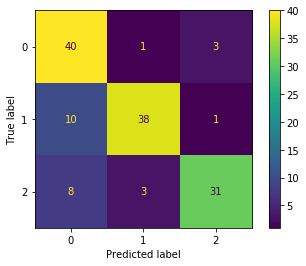

In [36]:
from sklearn.metrics import plot_confusion_matrix
print('SVM prediction')
plot_confusion_matrix(svm_pred[1], X_test, y_test)
plt.plot()

RandomForest prediction


[]

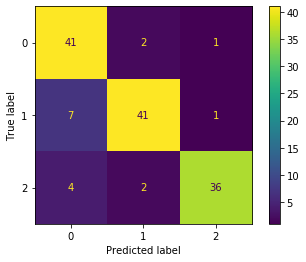

In [37]:
print('RandomForest prediction')
plot_confusion_matrix(rfc_pred[1], X_test, y_test)
plt.plot()

XGBOOST prediction


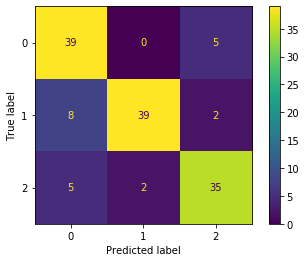

In [38]:
print('XGBOOST prediction')
plot_confusion_matrix(xgb_pred[1], X_test, y_test)
plt.show()

SGDC prediction


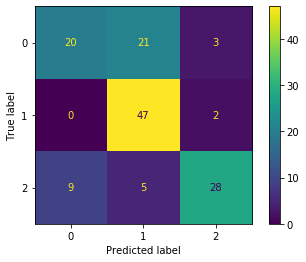

In [39]:
print('SGDC prediction')
plot_confusion_matrix(sgdc_pred[1], X_test, y_test)
plt.show()

### Hyperparameter Tuning

In [40]:
def svmhyper():
    svm_parameters = [{
        'C':[4,5,6,7,8],'kernel':['rbf'], 'gamma':[0.5,0.55,0.6,0.65,0.7,0.75],'decision_function_shape':['ovo','ovr']
    }]
    svm_gs = GridSearchCV(estimator=svm_pred[1],
                     param_grid=svm_parameters,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)
    svm_gs = svm_gs.fit(X_train,y_train)
    svm_accuracy = svm_gs.best_score_
    return svm_gs.best_estimator_, svm_accuracy


def randomhyper():
    rfc_parameters = [{
        'n_estimators': [350,400,450],
        'max_depth': [10, 11, 12],
        'criterion':['gini','entropy']
       }]
    rfc_gs = GridSearchCV(estimator=rfc_pred[1],
                     param_grid=rfc_parameters,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)
    rfc_gs = rfc_gs.fit(X_train,y_train)
    rfc_accuracy = rfc_gs.best_score_
    return rfc_gs.best_estimator_, rfc_accuracy


def xgbhyper():
    xgb_parameters = [{
        'max_depth':[5,6,7],
        'min_child_weight': [1,2],
        'eta':[.1,.2,.3],
        'objective':['multi:softprob','reg:logistic']
        }]
    xgb_gs = GridSearchCV(estimator=xgb_pred[1],
                     param_grid=xgb_parameters,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)
    xgb_gs = xgb_gs.fit(X_train,y_train)
    xgb_accuracy = xgb_gs.best_score_
    return xgb_gs.best_estimator_, xgb_accuracy


#### Setting the HyperParameters is optional

In [42]:
Hypersvm = svmhyper()
print("Best parameters of SVM is \n {} \n and accuracy is {}\n".format(Hypersvm[0],Hypersvm[1]))
Hyperrfc = randomhyper()
print("Best parameters of RandomForest is \n {} \n and accuracy is {}\n".format(Hyperrfc[0],Hyperrfc[1]))
Hyperxgb = xgbhyper()
print("Best parameters of XGBOOST is \n {} \n and accuracy is {}".format(Hyperxgb[0],Hyperxgb[1]))

Best parameters of SVM is 
 SVC(C=4, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma=0.6, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
 and accuracy is 0.9454637096774196

Best parameters of RandomForest is 
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=330,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 
 and accuracy is 0.8946572580645162

Best parameters of XGBOOST is 
 XGBClassifier(base_score=0.5, booster=

# End of model